In [1]:
import gym
import matplotlib.pyplot as plt
from IPython import display

Cliff walking involves crossing a gridworld from start to goal while avoiding falling off a cliff.

### Description
The game starts with the player at location [3, 0] of the 4x12 grid world with the goal located at [3, 11]. If the player reaches the goal the episode ends.

A cliff runs along [3, 1..10]. If the player moves to a cliff location it returns to the start location.

The player makes moves until they reach the goal.


### Action Space
The action shape is (1,) in the range {0, 3} indicating which direction to move the player.

0: Move up

1: Move right

2: Move down

3: Move left

In [2]:
env = gym.make('CliffWalking-v0', render_mode="rgb_array")


In [3]:
initial_state = env.reset()
print('Initial state: ', initial_state)

Initial state:  (36, {'prob': 1})


#### Attribute Description 

action_space: The Space object corresponding to valid actions, all valid actions should be contained with the space. For example, if the action space is of type Discrete and gives the value Discrete(4), this means there are four valid discrete actions: 0, 1, 2, 3.

observation_space: The Space object corresponding to valid observations, all valid observations should be contained with the space. For example, if the observation space is of type Box and the shape of the object is (48,), this denotes a valid observation will be an array of 48 numbers. We can check the box bounds as well with attributes.

reward_range: A tuple corresponding to the minimum and maximum possible rewards for an agent over an episode. The default reward range is set to -inf to inf



In [4]:
print('Action spaces: ', env.action_space)
print()
print('Observe spaces: ', env.observation_space)
print()
print('Reward range: ', env.reward_range)
print()
print('', env.spec)

Action spaces:  Discrete(4)

Observe spaces:  Discrete(48)

Reward range:  (-inf, inf)

 EnvSpec(id='CliffWalking-v0', entry_point='gym.envs.toy_text.cliffwalking:CliffWalkingEnv', reward_threshold=None, nondeterministic=False, max_episode_steps=None, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'render_mode': 'rgb_array'}, namespace=None, name='CliffWalking', version=0)


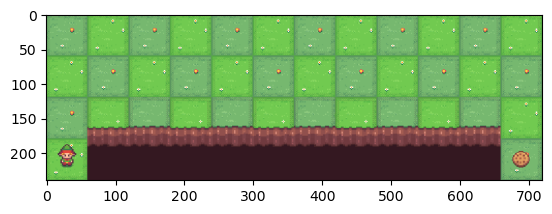

In [5]:
img = env.render()
plt.imshow(img)


#### env.step()

This method applies the action selected by the agent in the environment, to modify it. In response, the environment returns a tuple of four objects: 

- The next state
- The reward obtained
- (bool) if the task has been completed
- any other relevant information in a python dictionary

In [6]:
action = 0
observation, reward, terminated, truncated, info = env.step(action)
print('Observation: ', observation)
print('Reward: ', reward)
print('Terminated: ', terminated)
print('Truncated: ', truncated)
print('Info: ', info)

Observation:  24
Reward:  -1
Terminated:  False
Truncated:  False
Info:  {'prob': 1.0}


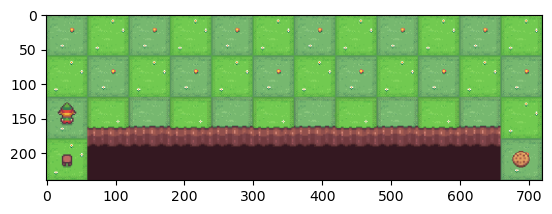

In [7]:
img = env.render()
plt.imshow(img)

In [8]:
env.close()

### Creating a trajectory

Trajectory:  [[(36, {'prob': 1}), 1, -100, False, 36], [36, 1, -100, False, 36], [36, 0, -1, False, 24]]


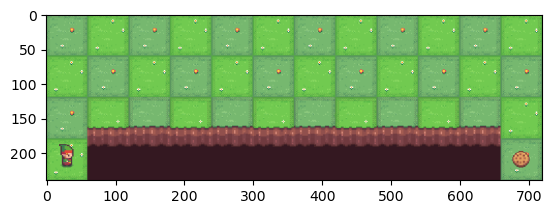

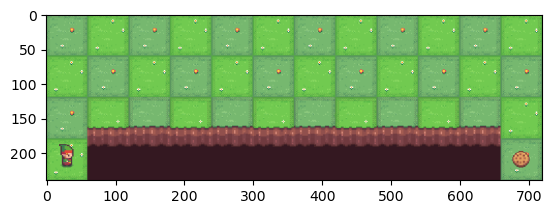

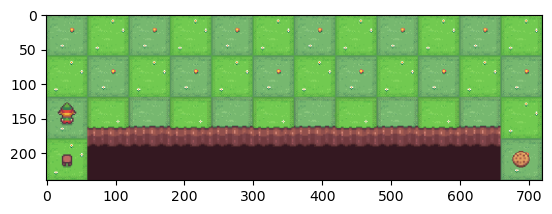

In [9]:
env = gym.make('CliffWalking-v0', render_mode="rgb_array")
current_state = env.reset()
trajectory = []

for i in range(3):
    action = env.action_space.sample()
    next_state, reward, terminated, truncated, info = env.step(action)
    trajectory.append([current_state, action, reward, terminated, next_state])
    current_state = next_state
    
    plt.figure()
    img = env.render()
    plt.imshow(img)
env.close()
    

print('Trajectory: ', trajectory)

### Generating an episode

Length of the episode:  5623


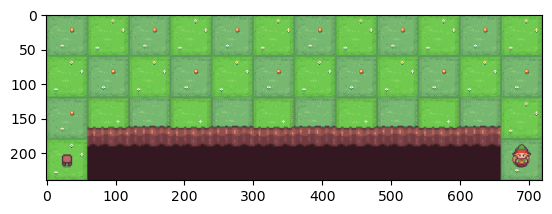

In [10]:
env = gym.make('CliffWalking-v0', render_mode="rgb_array")
current_state = env.reset()
episode = []
terminated = False

plt.figure()
img = env.render()
img=plt.imshow(img)

while not terminated:
    action = env.action_space.sample()
    next_state, reward, terminated, truncated, info = env.step(action)
    episode.append([current_state, action, reward, terminated, next_state])
    current_state = next_state
    
    img.set_data(env.render()) 
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    
env.close()

print('Length of the episode: ', len(episode))
# print(episode)

### Calculating returns with discount factor

KeyboardInterrupt: 

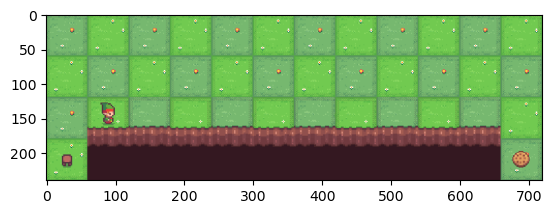

In [11]:


env = gym.make('CliffWalking-v0', render_mode="rgb_array")
gamma = 0.99
current_state = env.reset()
episode = []
terminated = False
G_0 = 0
t =  0

plt.figure()
img = env.render()
img=plt.imshow(img)

while not terminated:
    action = env.action_space.sample()
    next_state, reward, terminated, truncated, info = env.step(action)
    episode.append([current_state, action, reward, terminated, next_state])
    G_0 += gamma **  t  * reward
    
    current_state = next_state
    t += 1
    
    
    img.set_data(env.render()) 
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
env.close()

print('Return: ', G_0)
print('Length of the episode: ', len(episode))
